In [143]:
# Data from: https://ec.europa.eu/eurostat/cache/metadata/en/sdg_07_10_esmsip2.htm
import pandas as pd

df = pd.read_csv('~/Documents/Presentations/seaborn_tutorial/datasets/estat_sdg_07_10.tsv', sep='\t|,')
print(df)

    freq     unit geo\TIME_PERIOD   2000    2001   2002    2003    2004   \
0      A      I05              AL   83.8    85.6   96.6    93.7   100.2    
1      A      I05              AT   84.1    88.9   89.5    94.4    95.3    
2      A      I05              BE  101.6   101.0   97.0   101.9   101.5    
3      A      I05              BG   91.9    96.0   95.6    97.4    94.7    
4      A      I05              CY   94.4    95.5   96.1   105.3    98.6    
..   ...      ...             ...     ...     ...    ...     ...     ...   
108    A  TOE_HAB              SI   3.18    3.38   3.39    3.42    3.50    
109    A  TOE_HAB              SK   3.03    3.20   3.22    3.21    3.15    
110    A  TOE_HAB              TR   1.12    1.04   1.08    1.14    1.15    
111    A  TOE_HAB              UK   3.77    3.79   3.71    3.75    3.69    
112    A  TOE_HAB              XK      :       :      :    0.99    0.99    

      2005    2006   ...   2013    2014    2015    2016    2017     2018   \
0    100.0

/tmp/ipykernel_486378/2840412895.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('~/Documents/Presentations/seaborn_tutorial/datasets/estat_sdg_07_10.tsv', sep='\t|,')


           2000   2001   2002   2003   2004   2005   2006   2007   2008   \
geo                                                                        
AL          83.8   85.6   96.6   93.7  100.2  100.0   96.3   90.9   96.3   
AT          84.1   88.9   89.5   94.4   95.3  100.0   99.7   98.4   99.2   
BE         101.6  101.0   97.0  101.9  101.5  100.0   99.7   97.6   99.2   
BG          91.9   96.0   95.6   97.4   94.7  100.0  103.3  101.6   99.0   
CY          94.4   95.5   96.1  105.3   98.6  100.0  104.0  109.2  115.2   
CZ          92.1   94.6   95.7  100.0  101.3  100.0  102.3  102.7  100.0   
DE          98.6  101.7   99.3  100.1  100.7  100.0  103.5   98.2   99.7   
DK          98.3  101.5   99.9  105.6  102.6  100.0  107.2  104.7  102.1   
EE          86.3   91.2   85.9   92.0   98.7  100.0   98.9  116.5  101.8   
EL          89.7   92.7   94.0   96.4   97.9  100.0   99.9  100.1  100.6   
ES          84.2   86.4   89.2   92.7   97.6  100.0  100.4  102.1   98.4   
EU27_2020   

<Axes: ylabel='geo'>

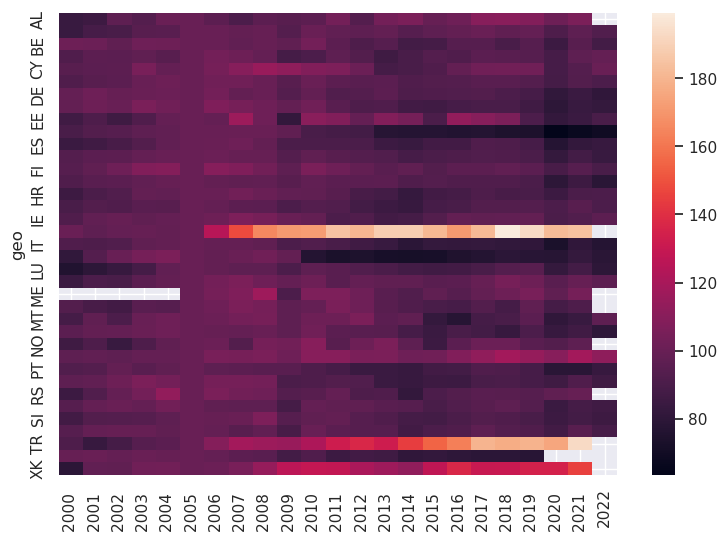

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import nan
sns.set_theme()

df_wide = df[df['unit'] == 'I05']
df_wide = df_wide.drop(['freq', 'unit'], axis=1)
df_wide = df_wide.rename(columns={"geo\TIME_PERIOD": "geo"})
df_wide = df_wide.stack().str.replace(':', 'NaN').str.replace(' ','').str.replace('b','').str.replace('p','').str.replace('e','').unstack()
df_wide = df_wide.set_index('geo')
df_wide = df_wide.astype(float)
print(df_wide)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_wide)

In [157]:
df_long = df_wide.reset_index()
df_long = pd.melt(df_long, id_vars='geo', var_name='year')
print(df_long)

    geo   year  value
0    AL  2000    83.8
1    AT  2000    84.1
2    BE  2000   101.6
3    BG  2000    91.9
4    CY  2000    94.4
..   ..    ...    ...
846  SI   2022   85.4
847  SK   2022   88.9
848  TR   2022    NaN
849  UK   2022    NaN
850  XK   2022    NaN

[851 rows x 3 columns]


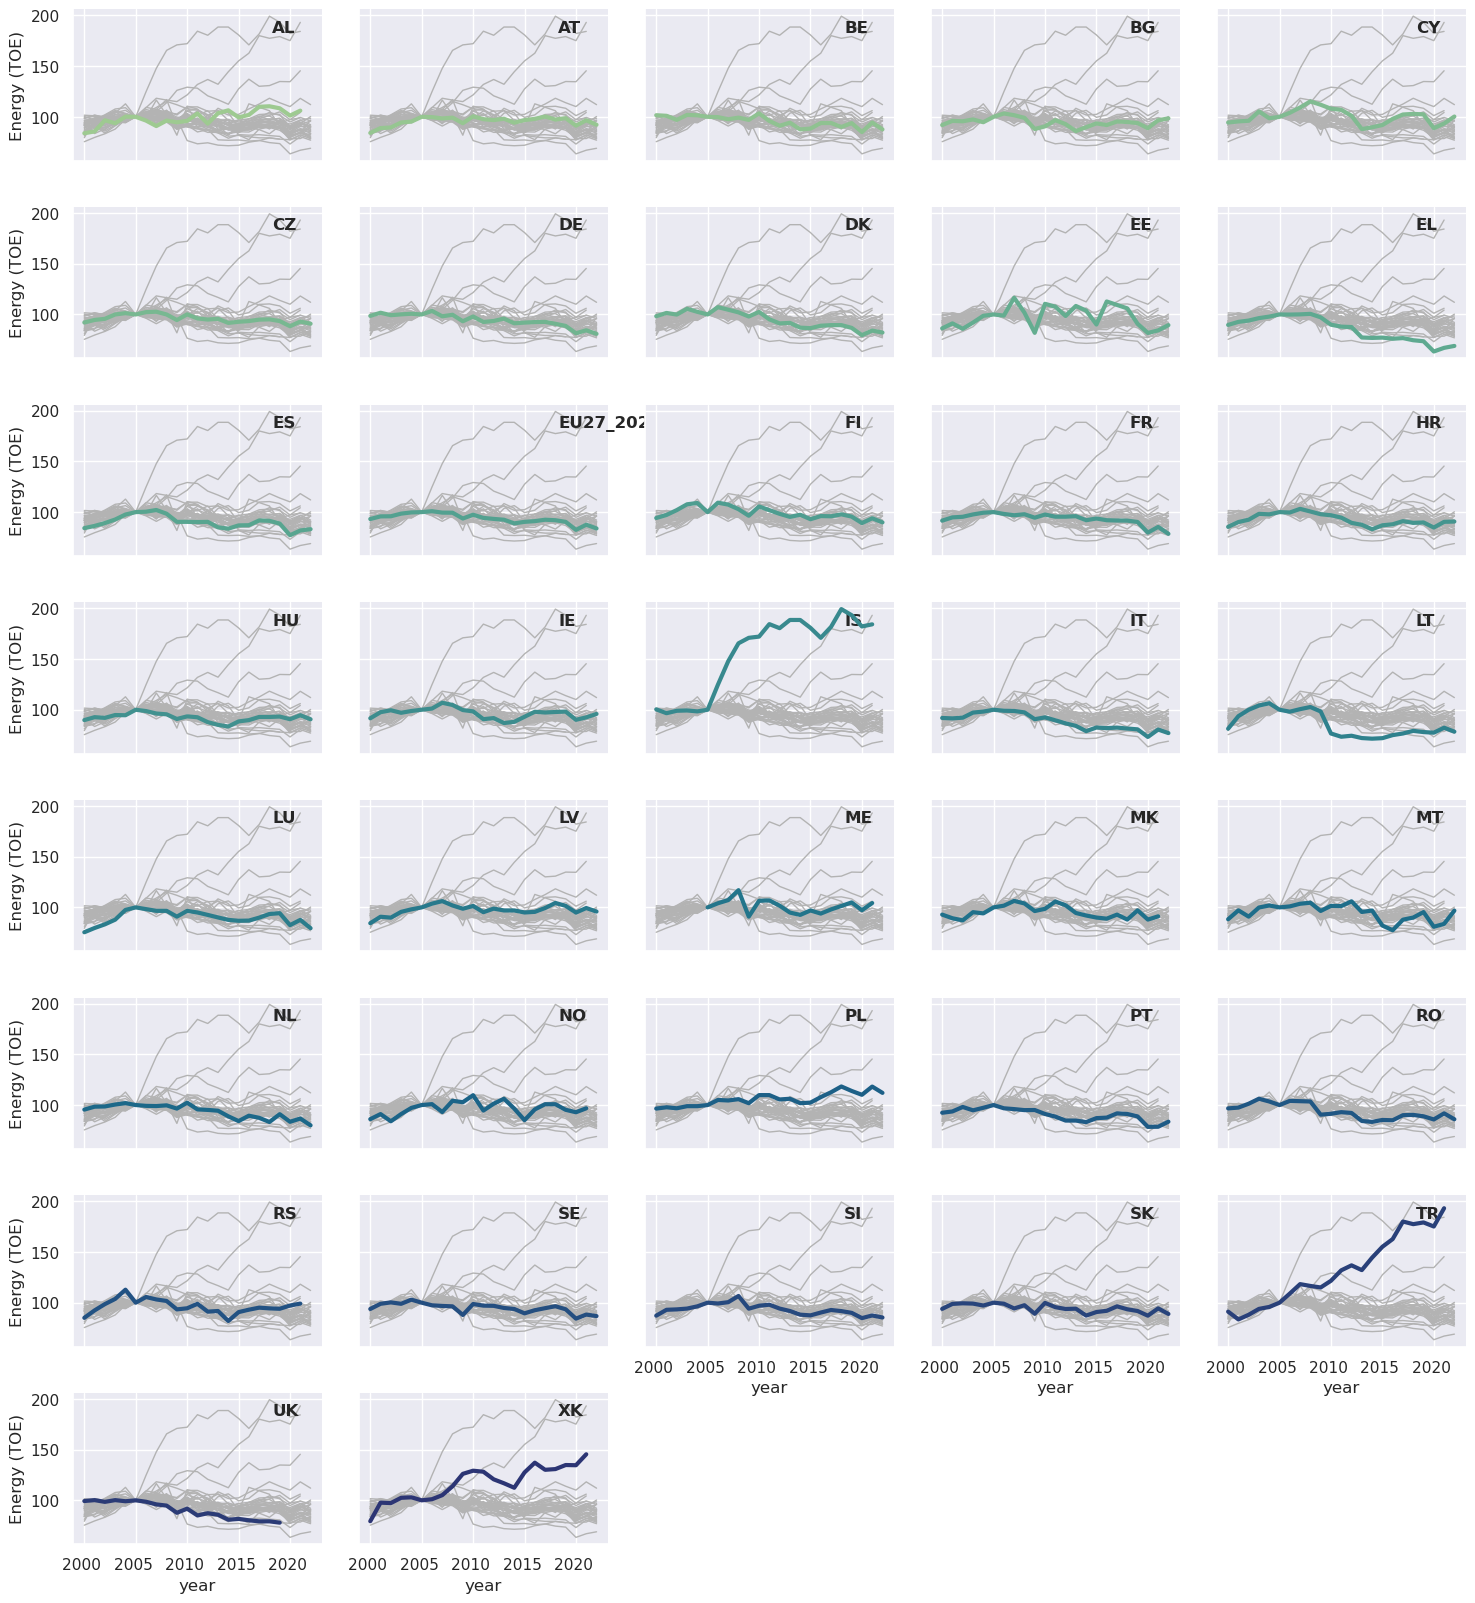

In [160]:
g = sns.relplot(
    data=df_long,
    x="year", y="value", col="geo", hue="geo",
    kind="line", palette="crest", linewidth=3, zorder=5,
    col_wrap=5, height=2, aspect=1.5, legend=False,
)

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Energy (TOE)")
g.tight_layout()

# Iterate over each subplot to customize further
for geo, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.8, .85, geo, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_long, x="year", y="value", units="geo",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::5])